### Semana 07 - lec 01 - Teste de Hipótese


#### Teste de Hipótese

  - distribuições e amostragens
  - distância entre distribuições - tamanho do efeito
  - distribuição chi-quadrado, t-student e normal (gaussiana)
  - qual a diferença entre as distribuições t-student, normal e Z?
  - o que é teste de hipótese?
      - chi-quadrado
      - t-student
      - revisitando: p-value, intervalo de confiança, tamanho de efeito
      - como monstar um barplot com barras de erros?
      - como calcular o n amostral mínimo
  - casos e exercícios
          - chi-quadrado
          - t-student
  - outros testes importantes:
          - teste de múltiplas comparações - Anova - análise variança (Ronald Fisher)
          - teste de Tukey (todos grupos entre si)
          - teste de Dunnett (todos grupos contra um único controle)
          - teste de Normalidade (Shapiro-Wilk)
          - Kolmogorov-Smirnov (comparando-se duas distribuições quaisquer)
  - testes não paramétricos:
          - exemplo em estudos clínicos de Vacina

#### Biblioteca scipy.stats

  - https://docs.scipy.org/doc/scipy/reference/stats.html
  

### Uma distribuição é diferente da outra?
  - Medicina:
    - Grupo de doentes (diabéticos):
      - mede um parâmetro: glicemia
      - medica todos os pacientes
      - espera 24h, 48h, 7d, 30d
      - mede o efetio da droga sobre a glicemia
    - Modelo experimental - não tão trival - área de conhecimento:
      - controlar os grupos
        - somente homens de 30 a 45 anos
        - somente caucasianos, orientas, afro-descentes
        - ...
  - Biologia molecular:
    - Uma cultura de células:
      - PBS - esperar 24 h, medir citocinas
      - Princípio Ativo, ou extrato (veneno): esperar 24 h, medir citocinas
      - Quer saber se os dois grupos são diferentes
      
### Vários grupos
  - Número amostral é grande, ou distribuição é normal
    - ANOVA
      - como você faz o teste:
        - todos contra todos: Tukey
        - todos contra um controle: Dunnett **
        
### Múltiplas comparações
  - Importante saber:
    - SAS, Prisma ... saber o que está fazendo
    - R, Python ...

### Teste de hipótese
  - Comparação entre duas distribuições
  - Pergunta: se estas são diferentes
    
  - Por definição:
    - as distribuições não são ESTATISCAMENTE diferentes: H0 - hipótese nula
    - se tiver que se afastar (negar) a H0, então você "adota" a Ha (hipótese alternativa)
    
    - para isto se usa "um número mágico" chamado p-value
    - importante **P-VALUE SOZINHO NÃO BASTA**

#### Esta lição:

  - distribuições e amostragens
  - distância entre distribuições - tamanho do efeito
  - distribuição chi-quadrado, t-student e normal (gaussiana)

In [2]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
from matplotlib import gridspec
%matplotlib inline

### Bernoulli

In [4]:
from scipy.stats import bernoulli

pis = [.2, .5, .8]
for p in pis:
    mu, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
    std = np.sqrt(var)
    print("p = %.1f mean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(p, mu, std, var, skew, kurt) )

p = 0.2 mean = 0.200, std = 0.400, var = 0.160, skew = 1.500, kurt = 0.250
p = 0.5 mean = 0.500, std = 0.500, var = 0.250, skew = 0.000, kurt = -2.000
p = 0.8 mean = 0.800, std = 0.400, var = 0.160, skew = -1.500, kurt = 0.250


### Momento (momento de força)

$var = \frac{\sum( x_i - \mu)**2}{n}$  --> segundo momento

  - Variance: é chamado o segundo momento
  - Skewness: é o terceiro momento  mdede a distorção da simetria
    - se o valor está entre -0.5 e +0.5 é dita simétrica
    - se o valor está abaixo de -0.5 está enviesada para a direita 
    - se o valor está acima  de +0.5 está enviesada para a esquerda
  - Kurtosis: é o quarto momento
    - tem a haver com outliers e o "rabo da distribuição"
    - se a kurtose é grade é porque a distribuição tem um "rabo longo"
    
veja:  
https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa  
https://brownmath.com/stat/shape.htm

### Distribuição Binomial (discreta, várias moedas - sim/não, cara/coroa)

In [6]:
coins = 2  # número de moedas
pis = [0.2, 0.5, 0.8]
N = 1000

j0 = np.random.binomial(coins, pis[0], N)
j1 = np.random.binomial(coins, pis[1], N)
j2 = np.random.binomial(coins, pis[2], N)

df = pd.DataFrame([j0, j1, j2]).T
df.columns=['p0', 'p1', 'p2']
df.head(10)

,p0,p1,p2
0,0,0,2
1,0,2,1
2,1,1,1
3,0,0,1
4,1,1,2
5,2,2,1
6,0,2,2
7,0,1,2
8,0,1,2
9,1,1,2


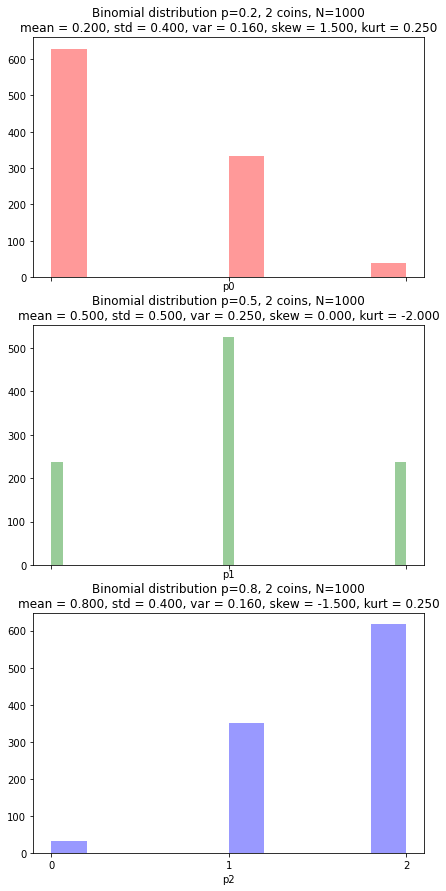

In [7]:
f, axes = plt.subplots(3, 1, figsize=(7, 15), sharex=True)

sns.distplot(df.p0, kde=False, color='red',   ax=axes[0])
p = pis[0]
title = 'Binomial distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
mu, var, skew, kurt = bernoulli.stats(p, moments='mvsk'); std = np.sqrt(var)
title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
axes[0].set_title(title)

sns.distplot(df.p1, kde=False, color='green', ax=axes[1])
p = pis[1]
title = 'Binomial distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
mu, var, skew, kurt = bernoulli.stats(p, moments='mvsk'); std = np.sqrt(var)
title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
axes[1].set_title(title)

sns.distplot(df.p2, kde=False, color='blue',  ax=axes[2]);
p = pis[2]
title = 'Binomial distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
mu, var, skew, kurt = bernoulli.stats(p, moments='mvsk'); std = np.sqrt(var)
title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
axes[2].set_title(title);
axes[2].set_xticks([0,1,2]);

### O que tem de errado no código???
### Para que repetir tudo? Crie uma função

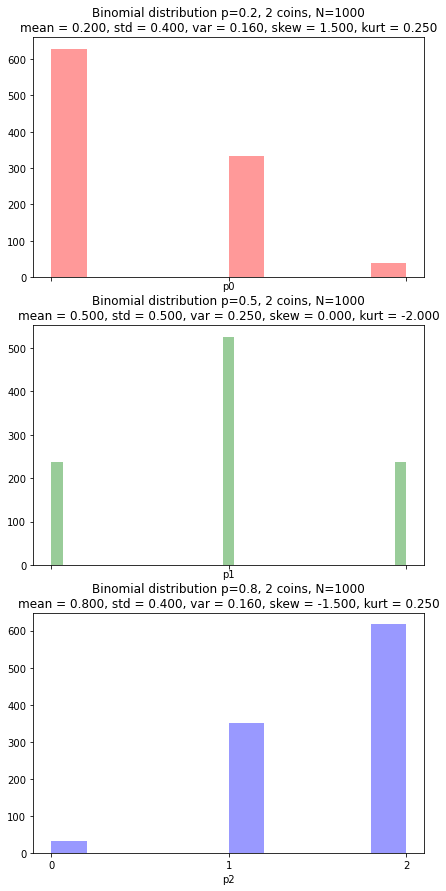

In [10]:
## Repare que pis, coins, e N são 'variáveis globais'

def calc_params_title(p):
    p = pis[i]
    title = 'Binomial distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
    mu, var, skew, kurt = bernoulli.stats(p, moments='mvsk'); std = np.sqrt(var)
    title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
    return title

colors = ['red', 'green', 'blue']
f, axes = plt.subplots(3, 1, figsize=(7, 15), sharex=True)

for i in range(3):
    # seaborn  distplot - distribution plot --> histogram
    sns.distplot(df['p%d'%i], kde=False, color=colors[i], ax=axes[i])
    
    # encapsulei numa função
    title = calc_params_title(pis[i])
    # plt.title()
    # ax.set_title()
    axes[i].set_title(title);
    
    axes[i].set_xticks([0,1,2]);

### Distribuição Poisson (discreta, eventos raros)

In [17]:
# medias de numero de acidentes a cada 10 anos
mus = [0.2, 1, 3]
N = 1000

j0 = np.random.poisson(mus[0], N)
j1 = np.random.poisson(mus[1], N)
j2 = np.random.poisson(mus[2], N)

df = pd.DataFrame([j0, j1, j2]).T
df.columns=['mu0', 'mu1', 'mu2']
df.head(5)

,mu0,mu1,mu2
0,0,2,5
1,0,2,4
2,0,3,2
3,0,2,2
4,0,1,2


0 0.2
1 1
2 3


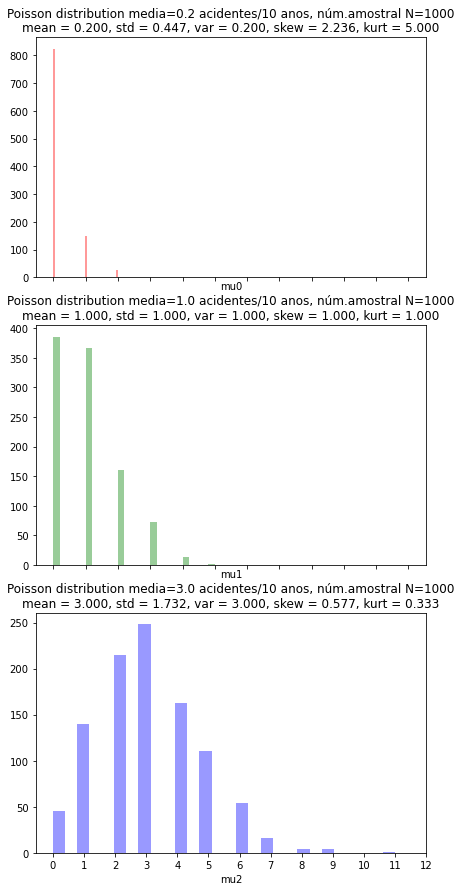

In [18]:
from scipy.stats import poisson

def calc_poisson_params_title(mu):
    title = 'Poisson distribution media=%.1f acidentes/10 anos, núm.amostral N=%d'%(mu, N)
    muc, var, skew, kurt = poisson.stats(mu, moments='mvsk'); std = np.sqrt(var)
    title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(muc, std, var, skew, kurt)
    return title

colors = ['red', 'green', 'blue']
f, axes = plt.subplots(3, 1, figsize=(7, 15), sharex=True)

for i in range(3):
    sns.distplot(df['mu%d'%i], kde=False, color=colors[i], ax=axes[i])
    print(i, mus[i])
    axes[i].set_title(calc_poisson_params_title(mus[i]))
    axes[i].set_xticks(np.arange(0,13));

### Em cada distribuição (paramétrica) tem seu conjunto de parâmetros:
  - Binomial:
    - n moedas, p (probabilidade de Cara e Coroa)
    - sim/não, True/False, Homem/Mulher
    - n dados ... seis lados
  - Poisson:
    - media ($\lambda$)
  - Normal:
    - media (loc), variança (eventualmente SD)
    

### Distribuição Normal (contínua)

In [25]:
mus = [0, 2, 4]
sdvs = [0.5, 1.0, 1.5]
N = 1000

j0 = np.random.normal(mus[0], sdvs[0], N)
j1 = np.random.normal(mus[1], sdvs[1], N)
j2 = np.random.normal(mus[2], sdvs[2], N)

df = pd.DataFrame([j0, j1, j2]).T
df.columns=['p0', 'p1', 'p2']
df.head(6)

,p0,p1,p2
0,-0.366600,2.630316,5.448634
1,1.135782,1.165795,4.436268
2,0.544034,2.466163,6.040305
3,0.322851,0.827205,3.463997
4,-0.108853,1.989627,2.418674
5,0.105558,0.387467,3.364620


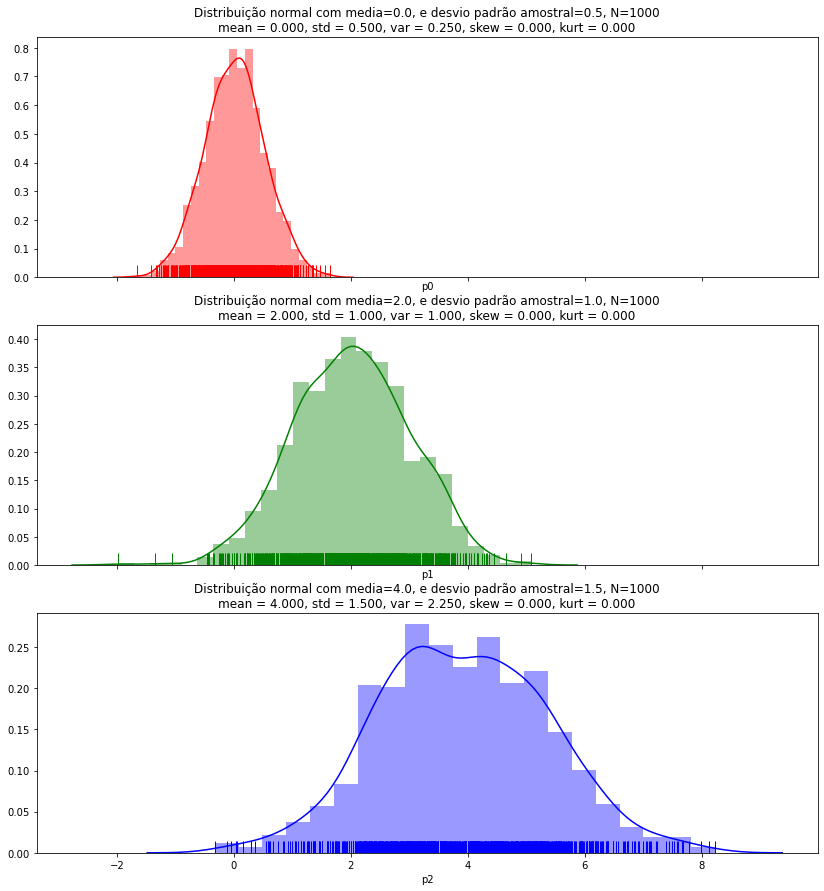

In [27]:
from scipy.stats import norm

def calc_normal_params_title(mu, sdv):
    p = pis[i]
    title = 'Distribuição normal com media=%.1f, e desvio padrão amostral=%.1f, N=%d'%(mu, sdv, N)
    muc, varc, skew, kurt = norm.stats(mu, sdv, moments='mvsk'); sdvc = np.sqrt(varc)
    title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(muc, sdvc, varc, skew, kurt)
    return title

colors = ['red', 'green', 'blue']
f, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

for i in range(3):
    mu  = mus[i]
    sdv = sdvs[i]
    
    random_data = df['p%d'%i]
    sns.distplot(random_data, color=colors[i], ax=axes[i], hist=True, kde=True, rug=True)
    axes[i].set_title(calc_normal_params_title(mu, sdv))

### distplot completo

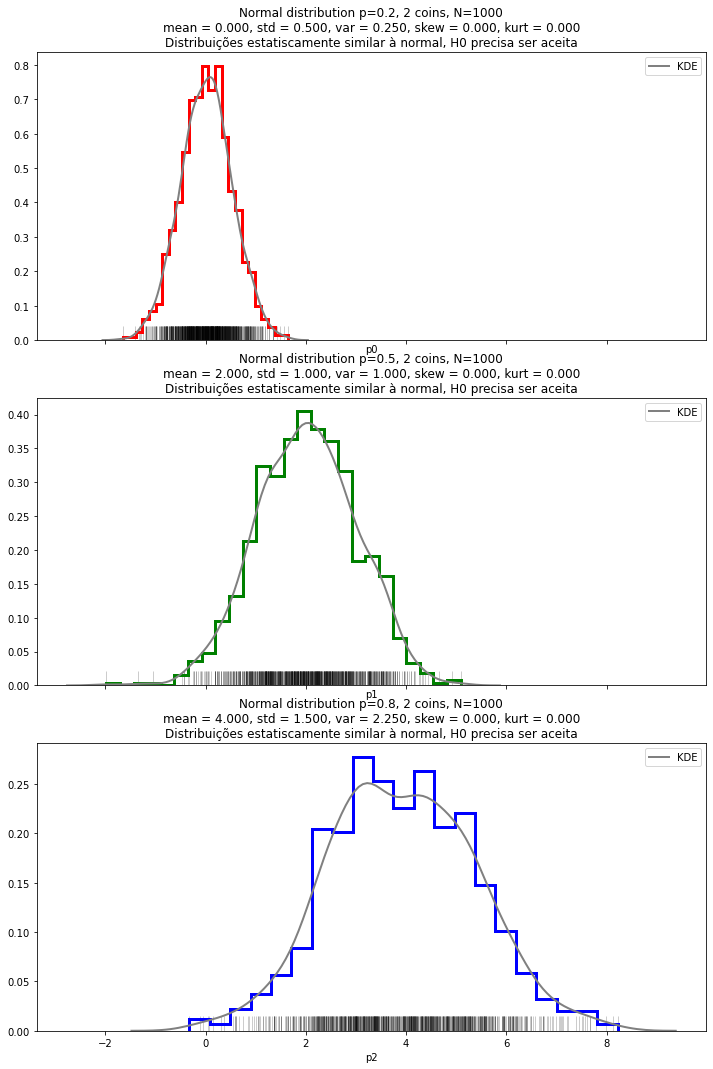

In [39]:
from scipy.stats import norm

def calc_normal_params_title(mu, sdv, serie_randomica, alpha = 0.05):
    p = pis[i]
    title = 'Normal distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
    mu, var, skew, kurt = norm.stats(mu, sdv, moments='mvsk'); std = np.sqrt(var)
    title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
    
    #----------- shapiro-wilks test --------------------------
    shapiro_test = stats.shapiro(serie_randomica)
    # retorna tupla = estatistica e pvalue
    statis, pval = shapiro_test

    if pval < alpha:
        # text_stat = 'Statiscally distinct, H0 must be refuted ' + text_stat
        text_stat = 'Distribuições estatiscamente diferente da normal, aceitar a Ha' 
    else:
        #text_stat = 'Statiscally similar, H0 must be accepetd ' + text_stat
        text_stat = 'Distribuições estatiscamente similar à normal, H0 precisa ser aceita' 

    title += '\n' + text_stat

    return title

colors = ['red', 'green', 'blue']
f, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

for i in range(3):
    serie_randomica = df['p%d'%i]
    
    sns.distplot(serie_randomica, ax=axes[i], hist=True, kde=True, rug=True,
                 #                           alpha = transparecia
                 rug_kws={"color": "black", "alpha": .2,},
                 kde_kws={"color": "gray", "lw": 2, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": colors[i]})
    
    axes[i].set_title(calc_normal_params_title(mus[i], sdvs[i], serie_randomica))

### Teste de hipótese de Shapiro-Wilks - normalidade

In [32]:
shapiro_test = stats.shapiro(df.p0)
# retorna tupla = estatistica e pvalue
print(shapiro_test)
statis, pval = shapiro_test
statis, pval

ShapiroResult(statistic=0.9994205236434937, pvalue=0.9936632513999939)


(0.9994205236434937, 0.9936632513999939)

In [35]:
alpha = 0.05

if pval < alpha:
    # text_stat = 'Statiscally distinct, H0 must be refuted ' + text_stat
    text_stat = 'Distribuições estatiscamente diferente da normal, aceitar a Ha' 
else:
    #text_stat = 'Statiscally similar, H0 must be accepetd ' + text_stat
    text_stat = 'Distribuições estatiscamente similar à normal, H0 precisa ser aceita' 
    
text_stat

'Distribuições estatiscamente similar à normal, H0 precisa ser aceita'

In [42]:
serie_randomica = df.p0
serie_randomica

0     -0.366600
1      1.135782
2      0.544034
3      0.322851
4     -0.108853
         ...   
995    0.222524
996    0.808928
997   -0.199143
998   -0.466574
999   -0.305311
Name: p0, Length: 1000, dtype: float64

In [43]:
df.iloc[0].p0

-0.36660020912269137

### Simulação de número baixo de amostras

In [50]:
samples = [0, 252, 421]
n = len(samples)

vals = [serie_randomica.iloc[i] for i in samples]

n, vals

(3, [-0.36660020912269137, -0.003153681886644097, 0.6369819429506596])

In [51]:
shapiro_test = stats.shapiro(vals)
statis, pval = shapiro_test
print(statis, pval)

alpha = 0.05

if pval < alpha:
    # text_stat = 'Statiscally distinct, H0 must be refuted ' + text_stat
    text_stat = 'Distribuições estatiscamente diferente da normal, aceitar a Ha' 
else:
    #text_stat = 'Statiscally similar, H0 must be accepetd ' + text_stat
    text_stat = 'Distribuições estatiscamente similar à normal, H0 precisa ser aceita' 
    
text_stat

0.9752890467643738 0.698523998260498


'Distribuições estatiscamente similar à normal, H0 precisa ser aceita'

In [52]:
np.round(np.mean(vals),2), np.round(np.std(vals),2)

(0.09, 0.41)

In [53]:
mus[0], sdvs[0]

(0, 0.5)